In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [2]:
# Read in the file and look at the first five rows
colorado = pd.read_table('CO_cleaned.csv',sep=',')
print(colorado.shape)
colorado.head()

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2584744, 26)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,vehicle_type,out_of_state
0,CO-2010-000001,CO,2010-01-01,00:00,10.0,Arapahoe County,8005.0,289,Golden,F,...,False,NaN,NaN,False,Verbal Warning,False,1024976.0,M,NA NA 0,False
1,CO-2010-000002,CO,2010-01-01,00:01,4.0,El Paso County,8041.0,3,Colorado Springs,F,...,False,NaN,NaN,False,Verbal Warning,False,1069803.0,NaN,NA NA 0,False
2,CO-2010-000003,CO,2010-01-01,00:01,24.0,Garfield County,8045.0,3,Glenwood Springs,M,...,False,NaN,NaN,False,Verbal Warning,False,1198321.0,M,NA NA 0,False
3,CO-2010-000004,CO,2010-01-01,00:02,19.0,Yuma County,8125.0,NaN,Sterling,M,...,False,NaN,NaN,False,Citation,False,1167059.0,NaN,Ford F-250 2003,False
4,CO-2010-000005,CO,2010-01-01,00:02,11.0,Jefferson County,8059.0,NaN,6A,F,...,False,NaN,NaN,False,Written Warning,False,1300790.0,NaN,Oldsmobile Intrigue 1999,False


**id** - The unique ID we assign to each stop. Contains the state and year.

**state** - The two-letter code for the state in which the stop occurred

**stop_date** - The date of the stop, in YYYY-MM-DD format. Some states do not provide the exact stop date: for example, they only provide the year or quarter in which the stop occurred. For these states, stop_date is set to the date at the beginning of the period: for example, January 1 if only year is provided.

**stop_time** - The 24-hour time of the stop, in HH:MM format.

**location_raw** - The original data value from which we compute the county (or comparably granular location) in which the stop occurred. Not in a standardized format across states.

**county_name** - The standardized name of the county in which the stop occurred.

**county_fips** - The standardized 5-digit FIPS code in which the stop occurred.

**district** - In several states (e.g., Illinois) the stop county cannot be inferred, but a comparably granular location can. This comparably granular location is stored in the district column. Most states do not have this column.

**fine_grained_location** - Any higher-resolution data about where the stop occurred: e.g., milepost or address. Not standardized across states.

**police_department** - The police department or agency that made the stop. Not in a standard format across states.

**driver_gender** - The driver’s gender, as recorded by the trooper. M, F, or NA.

**driver_age_raw** - The original data value from which we compute the driver’s age when they were stopped. May be age, birth year, or birth date. Not in a standard format across states.

**driver_age** - The driver’s age when they were stopped. Set to NA if less than 15 or greater than or equal to 100.

**driver_race_raw** - The original data value from which the driver’s standardized race is computed. Not in a standard format across states.

**driver_race** - The standardized driver race. Possible values are White, Black, Hispanic, Asian, Other, and NA, with NA denoting values which are unknown. Asian refers to Asian, Pacific Islander, and Indian. Native Americans/American Indians are included in the "other" category. Anyone with Hispanic ethnicity is classified as Hispanic, regardless of their recorded race.

**violation_raw** - The violation committed by the driver, in the language of the original data. Not in a standard format across states. Some stops have multiple violations.

**violation** - The violation committed by the driver, standardized into categories that are consistent across states.

**search_conducted** - A TRUE/FALSE value indicating whether a search was performed.

**search_type_raw** - The justification for the search, in the language of the original data. NA if no search was performed. Not in a standard format across states. Some states have multiple justifications for a search. 

**search_type** - The normalized justification for the search. Where possible, this is standardized into categories which are consistent across states. For example, if something is clearly a consent search, search_type is referred to as “Consent”. 

**contraband_found** - A TRUE/FALSE value indicating whether a search was performed and contraband was found. FALSE if no search was performed. 

**stop_outcome** - The outcome of the stop. Many states have idiosyncratic outcomes — for example, “CHP 215” in California — so this column is not standardized across states. “Citation” and “Warning” are the values which occur most commonly across states. If the stop has multiple outcomes, the most severe outcome is used. For example, if a stop resulted in a citation and a warning, stop_outcome would be “Citation”. 

**is_arrested** - A TRUE/FALSE value indicating whether an arrest was made.

**officer_id**

**officer_gender**

**vehicle_type**

**out_of_state**

*For several fields (e.g., driver_race) we include a "raw" column which records the original data values from which we infer standardized values. For example, driver_race_raw might be “White Hispanic” which we code as “Hispanic” in the standardized driver_race field. We include the raw columns because our data processing pipeline is extensive, requiring judgment calls and subjective decisions. We aim to make our data processing as transparent as possible. Other analysts may choose to process the raw data differently if their needs or judgments differ.* (https://github.com/5harad/openpolicing/blob/master/DATA-README.md)

In [3]:
# Drop the raw columns and other duplicative columns.
colorado.drop(['state','location_raw','driver_age_raw','driver_race_raw','violation_raw','search_type_raw',
               'county_fips','fine_grained_location'],axis=1, inplace = True)
print(colorado.shape)

(2584744, 18)


In [4]:
# Change stop_date and stop_time columns to datetime format
# https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
colorado['stop_date'] = pd.to_datetime(colorado['stop_date'])
colorado['stop_time'] = pd.to_datetime(colorado['stop_time'], format='%H:%M').dt.time

In [5]:
# Change three columns to boolean
colorado[['contraband_found','is_arrested','out_of_state']] = colorado[['contraband_found','is_arrested',
                                                                        'out_of_state']].astype(bool)

In [6]:
# Type of value for each column
colorado.dtypes

id                           object
stop_date            datetime64[ns]
stop_time                    object
county_name                  object
police_department            object
driver_gender                object
driver_age                  float64
driver_race                  object
violation                    object
search_conducted               bool
search_type                  object
contraband_found               bool
stop_outcome                 object
is_arrested                    bool
officer_id                  float64
officer_gender               object
vehicle_type                 object
out_of_state                   bool
dtype: object

Almost all columns are categorical. The exceptions are the 'id' column, and the stop_date and stop_time.

In [7]:
# Count the number of null values in each column. In total there are 2,584,744 rows.
colorado.isnull().sum()

id                         0
stop_date                  3
stop_time                  0
county_name               27
police_department       4688
driver_gender         368416
driver_age            396639
driver_race           399256
violation             458176
search_conducted           0
search_type          2575920
contraband_found           0
stop_outcome         1288442
is_arrested                0
officer_id                 2
officer_gender       1594782
vehicle_type               0
out_of_state               0
dtype: int64

In [8]:
colorado['stop_outcome'].unique()

array(['Verbal Warning', 'Citation', 'Written Warning', 'Arrest', nan], dtype=object)

In [9]:
# Count the number of unique values in each column
colorado.apply(lambda x: len(x.unique()))

id                   2584744
stop_date               2289
stop_time               1440
county_name               65
police_department         54
driver_gender              3
driver_age                86
driver_race                6
violation               1953
search_conducted           2
search_type                4
contraband_found           2
stop_outcome               5
is_arrested                2
officer_id           2564338
officer_gender             6
vehicle_type          154137
out_of_state               2
dtype: int64

### Counts of Features

In [10]:
# Count stops by age of driver
ageCount = colorado['driver_age'].value_counts().sort_values(ascending=False).head(50)
ageCount = ageCount.to_frame()
ageCount.columns = ['count']
ageCount['driver_age'] = ageCount.index
ageCount.head(12)

,count,driver_age
23.0,61348,23.0
22.0,61022,22.0
21.0,60556,21.0
24.0,59962,24.0
20.0,59594,20.0
19.0,58551,19.0
25.0,58531,25.0
26.0,56602,26.0
27.0,54995,27.0
28.0,54422,28.0


The top 12 ages stopped are 19-30. This may be because they are newer drivers who most likely drive faster. Also, because they are over 18, they may drive farther distances and be outside of their childhood home (where their parents may drive more).

Current size: [6.0, 4.0]


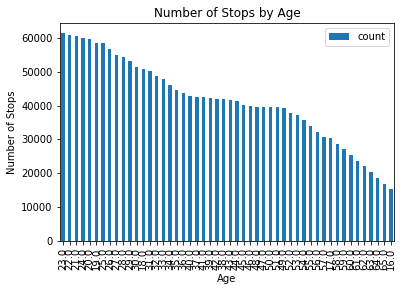

In [11]:
#Show Top 50 Ages of Drivers Pulled Over
ageCount.plot.bar(x='driver_age', y='count')
plt.xlabel('Age')
plt.ylabel('Number of Stops')
plt.title('Number of Stops by Age')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [16.0, 12.0]
print "Current size:", fig_size

# Set figure width to 16 and height to 12
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [12]:
# Count stops by gender of driver
genderCount = colorado['driver_gender'].value_counts().sort_values(ascending=False)
genderCount = genderCount.to_frame()
genderCount.columns = ['count']
genderCount['driver_gender'] = genderCount.index
genderCount.head()

,count,driver_gender
M,1527440,M
F,688888,F


There are more than twice as many men than women that are pulled over.

In [13]:
# Split colorado by Gender
youngCO = colorado[(colorado['driver_age'] >= 16) & (colorado['driver_age'] <= 50)]
maleCO = youngCO[youngCO.driver_gender == 'M']
femaleCO = youngCO[youngCO.driver_gender == 'F']

# Count stops by age of MALE drivers
mAgeCount = maleCO['driver_age'].value_counts()
mAgeCount = mAgeCount.to_frame()
mAgeCount.columns = ['count']
mAgeCount['driver_age'] = mAgeCount.index
mAgeCount.sort_values(by=['driver_age'],inplace=True)
print(mAgeCount.head())

# Count stops by age of FEMALE drivers
fAgeCount = femaleCO['driver_age'].value_counts()
fAgeCount = fAgeCount.to_frame()
fAgeCount.columns = ['count']
fAgeCount['driver_age'] = fAgeCount.index
fAgeCount.sort_values(by=['driver_age'],inplace=True)
print(fAgeCount.head())

      count  driver_age
16.0   9137        16.0
17.0  18492        17.0
18.0  31744        18.0
19.0  36694        19.0
20.0  38007        20.0
      count  driver_age
16.0   6067        16.0
17.0  11870        17.0
18.0  18956        18.0
19.0  21646        19.0
20.0  21383        20.0


We can from the Age graph above that 20-30 year olds get pulled over most often. We will look at the stop data for 16-50 year olds by gender since this group makes up most stops.

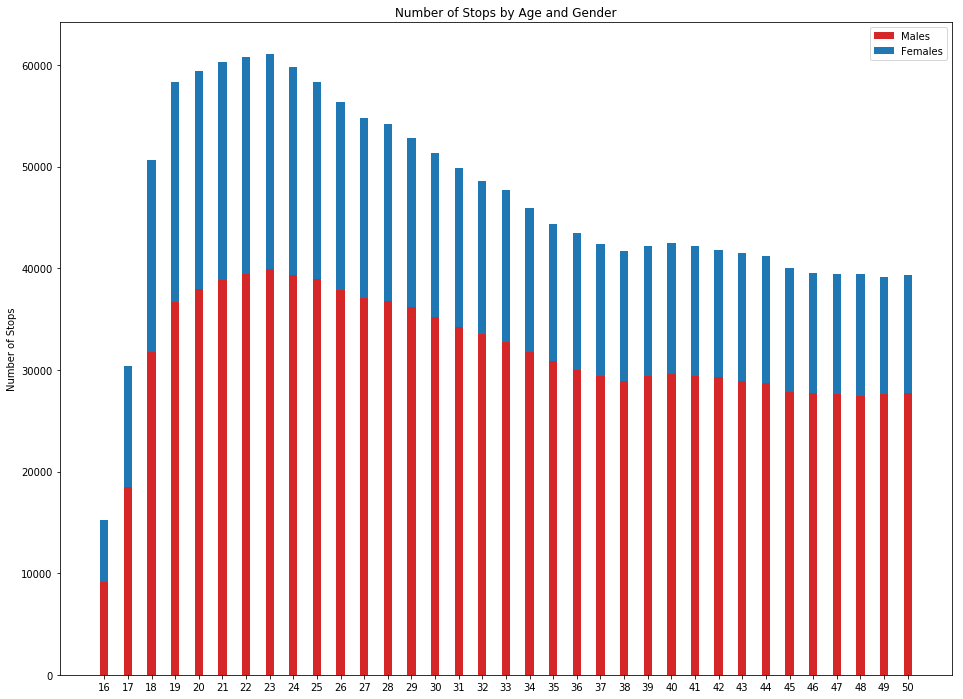

In [14]:
# Show ages by gender with stacked bar graph

# Position on x-axis. The ages.
ind = youngCO['driver_age'].unique().tolist()
ind = sorted(ind)   # the x locations for the groups
width = .35       # the width of the bars: can also be len(x) sequence

mCount = mAgeCount['count'].tolist()
fCount = fAgeCount['count'].tolist()

p1 = plt.bar(ind, mCount, width, color='#d62728')
p2 = plt.bar(ind, fCount, width,bottom=mCount)

plt.ylabel('Number of Stops')
plt.title('Number of Stops by Age and Gender')
plt.xticks(ind)
plt.legend((p1[0], p2[0]), ('Males', 'Females'))

plt.show()

In [15]:
# Show percentages of each gender
mAgeCount['percent'] = mAgeCount['count']/(mAgeCount['count']+fAgeCount['count'])
print(mAgeCount.head(10))

fAgeCount['percent'] = fAgeCount['count']/(mAgeCount['count']+fAgeCount['count'])
print(fAgeCount.head(20))

      count  driver_age   percent
16.0   9137        16.0  0.600960
17.0  18492        17.0  0.609051
18.0  31744        18.0  0.626114
19.0  36694        19.0  0.628968
20.0  38007        20.0  0.639956
21.0  38864        21.0  0.644308
22.0  39470        22.0  0.648793
23.0  39902        23.0  0.652612
24.0  39372        24.0  0.658725
25.0  38995        25.0  0.668432
      count  driver_age   percent
16.0   6067        16.0  0.399040
17.0  11870        17.0  0.390949
18.0  18956        18.0  0.373886
19.0  21646        19.0  0.371032
20.0  21383        20.0  0.360044
21.0  21455        21.0  0.355692
22.0  21366        22.0  0.351207
23.0  21240        23.0  0.347388
24.0  20398        24.0  0.341275
25.0  19343        25.0  0.331568
26.0  18501        26.0  0.328014
27.0  17761        27.0  0.324082
28.0  17433        28.0  0.321488
29.0  16657        29.0  0.315193
30.0  16083        30.0  0.313356
31.0  15702        31.0  0.314713
32.0  15075        32.0  0.309975
33.0  14909   

There is a smaller disparity between men and women who are pulled over in the younger (18-33) age range. Men are 60-65% of the stops, while women are 35-40%. The older group split is closer to 70% men and 30% women.

In [16]:
# Count stops by race of driver
raceCount = colorado['driver_race'].value_counts().sort_values(ascending=False)
raceCount = raceCount.to_frame()
raceCount.columns = ['count']
raceCount['driver_race'] = raceCount.index
raceCount['percent'] = raceCount['count']/2185488
raceCount.head()

,count,driver_race,percent
White,1767840,White,0.808899
Hispanic,308507,Hispanic,0.141162
Black,71967,Black,0.032929
Asian,32471,Asian,0.014858
Other,4703,Other,0.002152


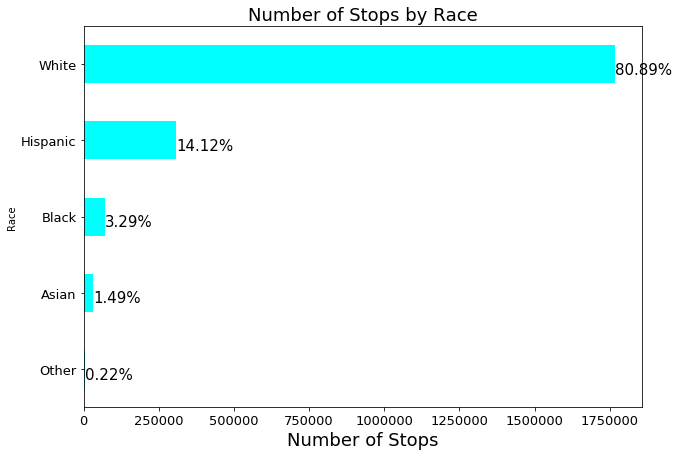

In [17]:
#Show Race of Drivers Pulled Over
#ax = raceCount.plot.bar(x='driver_race', y='count')
#ax.set_xlabel('Race')
#ax.set_ylabel('Number of Stops')
#ax.set_title('Number of Stops by Race')

ax = colorado['driver_race'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color='aqua', fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Number of Stops by Race', fontsize=18)
ax.set_xlabel('Number of Stops', fontsize=18)
ax.set_ylabel('Race')

# Add percentages to each bar
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')
    
# invert for largest on top 
ax.invert_yaxis()

plt.show()

The percentages by race for drivers pulled over looks to be fairly close to the demographics of Colorado. A quick search on Wikipedia says...

*According to the 2010 United States Census, Colorado had a population of 5,029,196. Racial composition of the state's population was:*

*81.3% White American (70.0% Non-Hispanic White, 11.3% Hispanic white)*
*20.7% Hispanic and Latino American (of any race) heritage*
*7.2% Some Other Race*
*4.0% Black or African American*
*3.4% Multiracial American*
*2.8% Asian American*
*1.1% American Indian and Alaska Native*
*0.1% Native Hawaiian and Other Pacific Islander (https://en.wikipedia.org/wiki/Colorado#Demographics)*

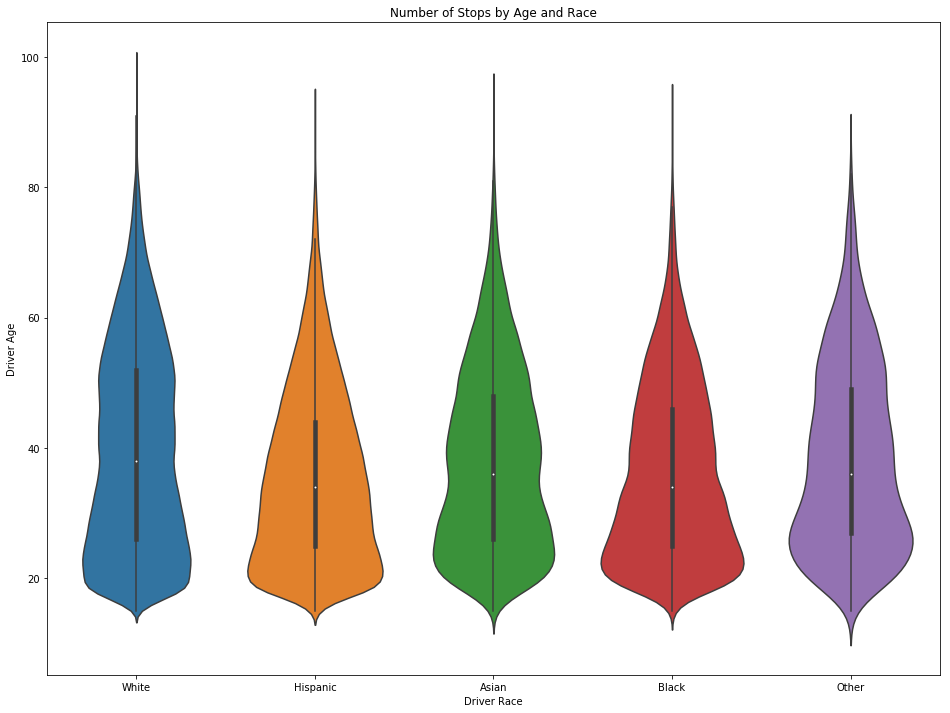

In [18]:
# Driver Age by Race
ax = sns.violinplot(x='driver_race', y='driver_age', data=colorado)
plt.xlabel('Driver Race')
plt.ylabel('Driver Age')
plt.title('Number of Stops by Age and Race')
plt.show()

Each of the age by race plots above show that younger drivers of all races are pulled over more often. It looks like stops for Hispanic and Black drivers steadily decrease as the populations get older, while White, Asian and Other plateau for a bit and then decrease somewhere around 60 years of age.

In [19]:
# Count stops by county of driver
countyCount = colorado['county_name'].value_counts().sort_values(ascending=False)
countyCount = countyCount.to_frame()
countyCount.columns = ['count']
countyCount['county_name'] = countyCount.index
countyCount.head()

,count,county_name
El Paso County,210994,El Paso County
Jefferson County,200086,Jefferson County
Adams County,164584,Adams County
Weld County,126859,Weld County
Larimer County,125389,Larimer County


Current size: [16.0, 12.0]


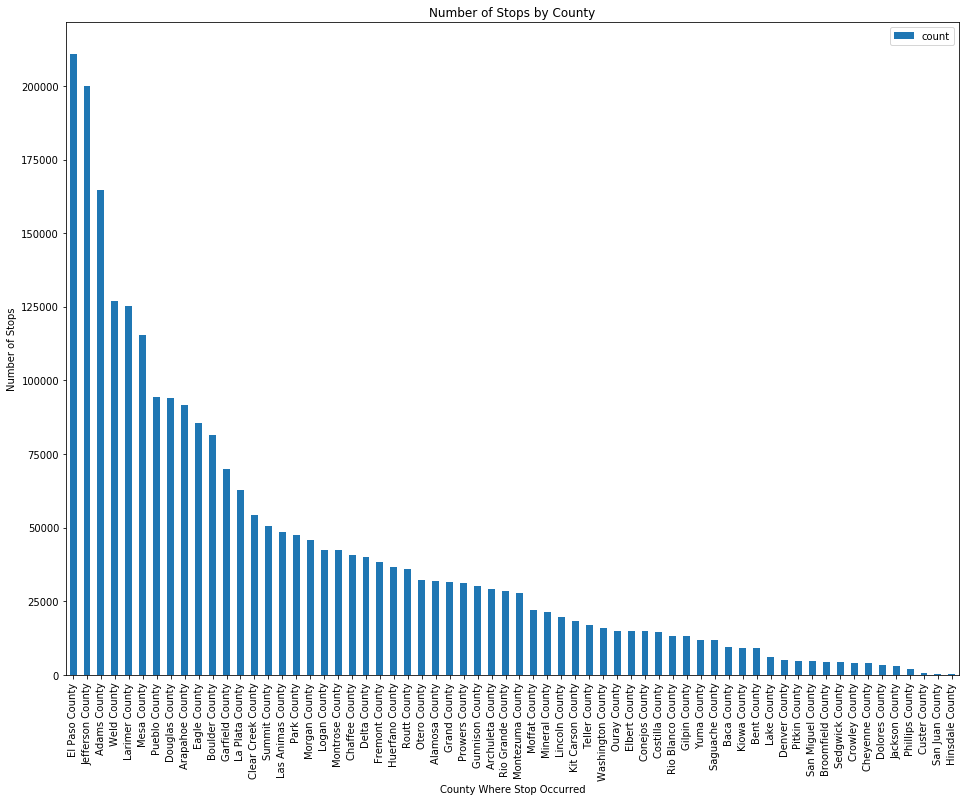

In [20]:
#Show County of Drivers Pulled Over
countyCount.plot.bar(x='county_name', y='count')
plt.xlabel('County Where Stop Occurred')
plt.ylabel('Number of Stops')
plt.title('Number of Stops by County')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 8 and height to 6
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

El Paso is the county with the highest number of stops. This county is in the mountains, on a major N/S interstate and contains the second largest city in Colorado. Jefferson county is second. It is in an area that is a major entrance from the Frontrange to the mountains for skiing and outdoor activity with major highways.

In [21]:
# Count stops by driver violation
violationCount = colorado['violation'].value_counts().sort_values(ascending=False).head(50)
violationCount = violationCount.to_frame()
violationCount.columns = ['count']
violationCount['violation'] = violationCount.index
violationCount.head()

,count,violation
Speeding,775543,Speeding
Safe movement,279502,Safe movement
Other,163273,Other
Lights,142279,Lights
Registration/plates,122335,Registration/plates


Current size: [16.0, 12.0]


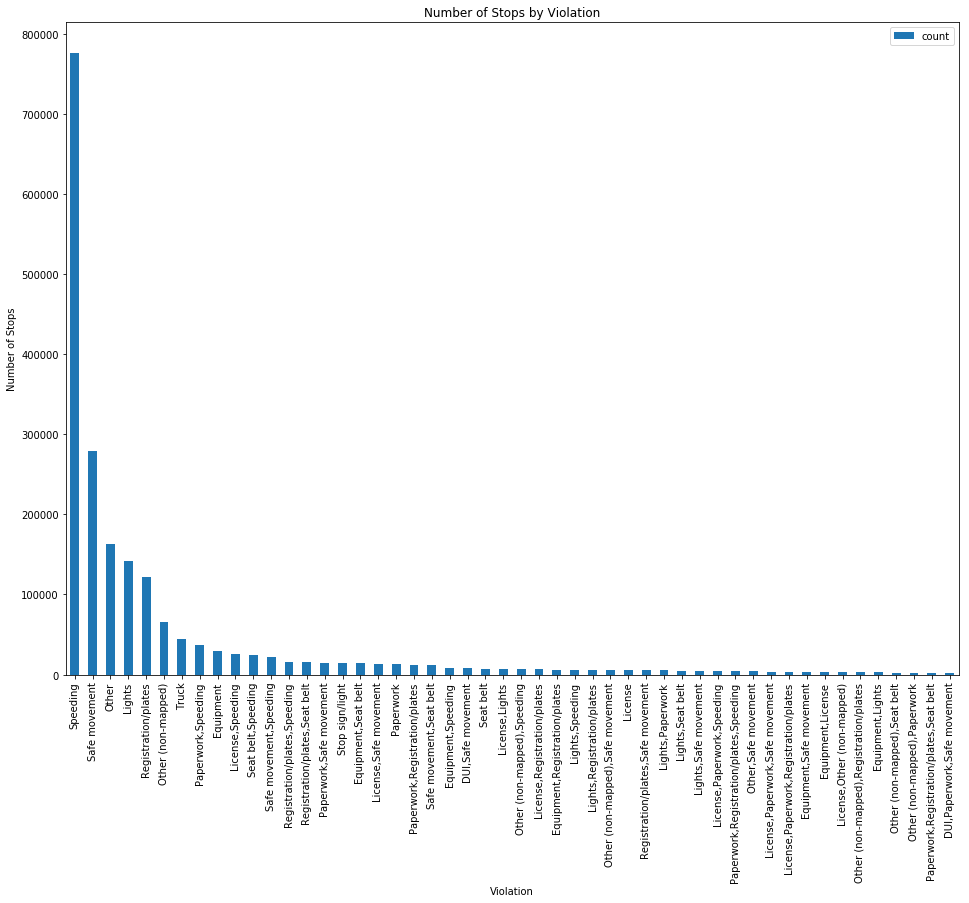

In [22]:
#Show Violation of Drivers Pulled Over
violationCount.plot.bar(x='violation', y='count')
plt.xlabel('Violation')
plt.ylabel('Number of Stops')
plt.title('Number of Stops by Violation')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 8 and height to 6
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

There are 1953 violations in the dataset. The large number is because new categories are created for combinations of violations. The top 11 violations make up 80.37% of the total, so it may be interesting to only use those for further analysis.

In [23]:
violationCount['percent'] = violationCount['count']/(colorado['violation'].notnull().sum())
violationCount.head(11)

,count,violation,percent
Speeding,775543,Speeding,0.364692
Safe movement,279502,Safe movement,0.131433
Other,163273,Other,0.076778
Lights,142279,Lights,0.066905
Registration/plates,122335,Registration/plates,0.057527
Other (non-mapped),65411,Other (non-mapped),0.030759
Truck,44028,Truck,0.020704
"Paperwork,Speeding",37373,"Paperwork,Speeding",0.017574
Equipment,29559,Equipment,0.013900
"License,Speeding",25161,"License,Speeding",0.011832


In [24]:
# Count stops by vehicle type
vehicleCount = colorado['vehicle_type'].value_counts().sort_values(ascending=False).head(50)
vehicleCount = vehicleCount.to_frame()
vehicleCount.columns = ['count']
vehicleCount['vehicle_type'] = vehicleCount.index
vehicleCount.head()

,count,vehicle_type
NA NA 0,929487,NA NA 0
NA NA NA,900426,NA NA NA
FORD NA 0,2947,FORD NA 0
Ford NA 0,2489,Ford NA 0
CHEVROLET NA 0,1985,CHEVROLET NA 0


Most of the vehicle types are not available. They are marked as 'NA NA 0' or 'NA NA NA', so this column will not be useful for our analysis.

In [25]:
# Count stops for In or Out of State 
stateCount = colorado['out_of_state'].value_counts().sort_values(ascending=False)
stateCount = stateCount.to_frame()
stateCount.columns = ['count']
stateCount['out_of_state'] = stateCount.index
stateCount.head()

,count,out_of_state
False,2114289,False
True,470455,True


In [26]:
from __future__ import division
470455/(470455+2114289)

0.18201222248702387

18% of the stops were Out-of-State drivers, which seems high. It would be interesting to know how many of the cars on the roads were out-of-state. I would guess that the locations officers set up to monitor drivers are on major highways that travelers use.

In [27]:
# Count stops by Police Department 
deptCount = colorado['police_department'].value_counts().sort_values(ascending=False)
deptCount = deptCount.to_frame()
deptCount.columns = ['count']
deptCount['police_department'] = deptCount.index
deptCount.head()

,count,police_department
Golden,283503,Golden
Colorado Springs,214858,Colorado Springs
Glenwood Springs,178025,Glenwood Springs
Pueblo,168734,Pueblo
Castle Rock,162683,Castle Rock


Current size: [16.0, 12.0]


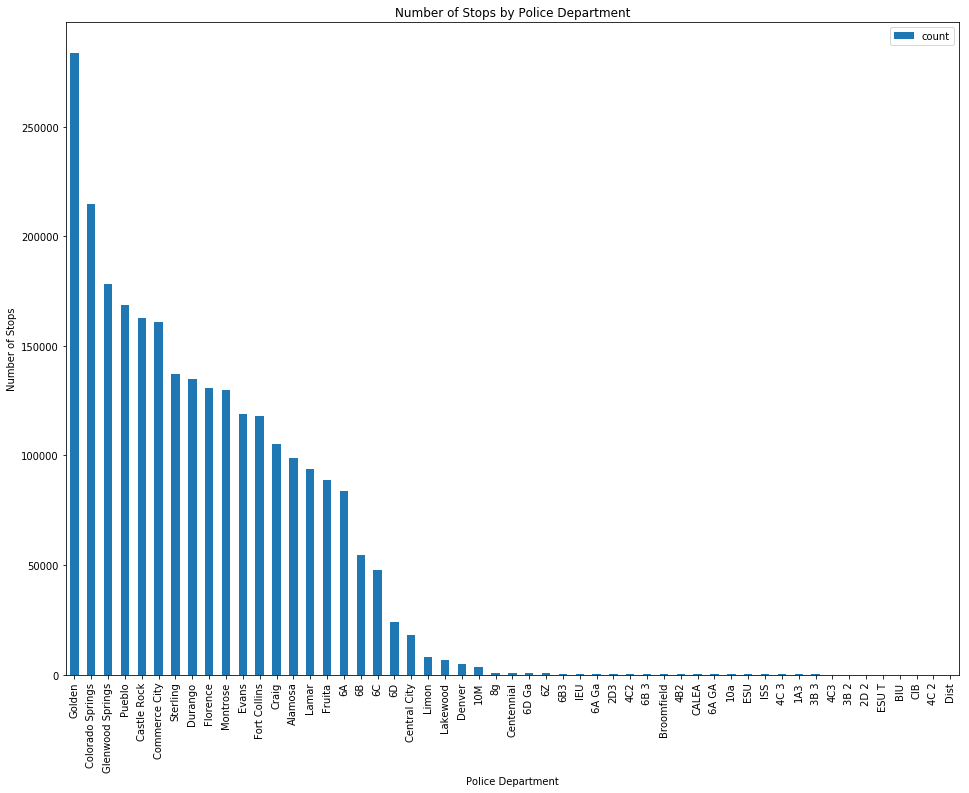

In [28]:
#Show Police Department who Made the Stop
deptCount.plot.bar(x='police_department', y='count')
plt.xlabel('Police Department')
plt.ylabel('Number of Stops')
plt.title('Number of Stops by Police Department')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 8 and height to 6
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

The County data is very interesting. Golden is an area much of the Front Range has to pass through to get to the mountains. There are several major highways in the area. Denver is the capital city of Colorado, but a very small portion of the stops.

In [29]:
# Split Data Out Where a Search was Conducted
search = colorado[colorado['search_conducted']==True]
search.head()

,id,stop_date,stop_time,county_name,police_department,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,vehicle_type,out_of_state
130,CO-2010-000131,2010-01-01,01:20:00,Weld County,Evans,F,20.0,Hispanic,"DUI,Other,Safe movement",True,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
131,CO-2010-000132,2010-01-01,01:20:00,Weld County,Evans,F,18.0,Hispanic,"DUI,Other,Safe movement",True,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
132,CO-2010-000133,2010-01-01,01:20:00,Weld County,Evans,F,20.0,Hispanic,"DUI,Other,Safe movement",True,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
133,CO-2010-000134,2010-01-01,01:20:00,Weld County,Evans,M,17.0,Black,"DUI,Other,Safe movement",True,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
279,CO-2010-000280,2010-01-01,06:25:00,Routt County,Craig,M,47.0,White,DUI,True,Incident to Arrest,False,Arrest,True,1234237.0,NaN,NA NA 0,False


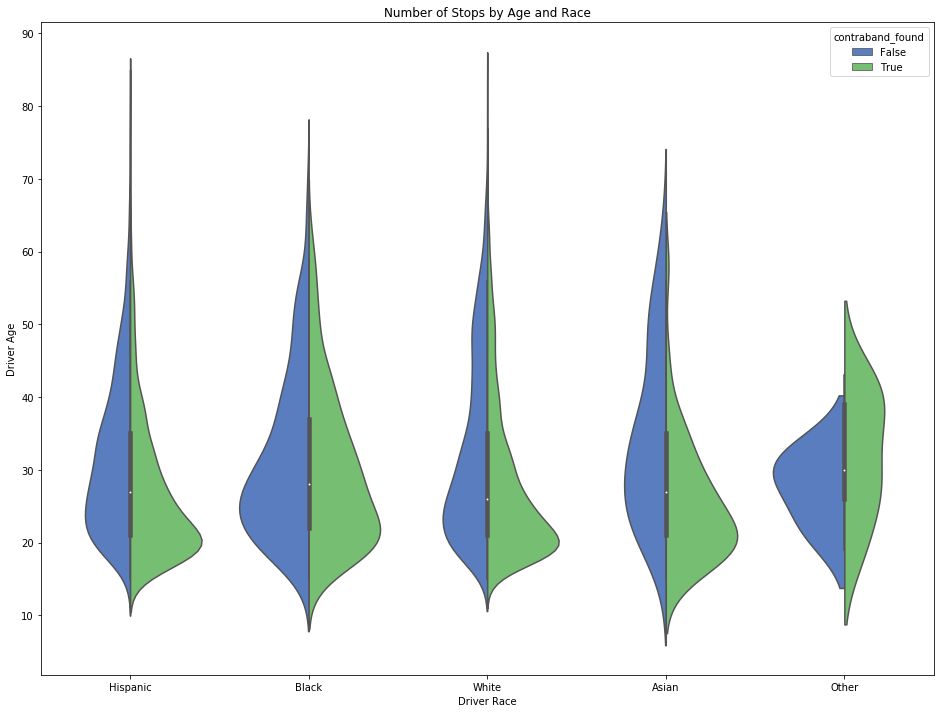

In [30]:
# Of the stops where a search was conducted, was there contraband found? Plotted by Age and Race.
ax = sns.violinplot(x='driver_race', y='driver_age', hue='contraband_found',data=search, palette="muted", split=True)
plt.xlabel('Driver Race')
plt.ylabel('Driver Age')
plt.title('Number of Stops by Age and Race')
plt.show()

The violin plots above show, of the searches conducted, whether there was contraband found or not. They are grouped by race and show age along the y-axis. The blue coloring shows when no contraband was found. A higher incidence of not finding contraband may indicate a particular group is unfairly targeted. For example, younger black individuals have a fairly large number of searches conducted with no contraband found when compared to other groups.

In [31]:
# Change True/False to 0/1 for search_conducted
search.search_conducted.replace((True, False), (1, 0), inplace=True)
search.head()

/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,stop_date,stop_time,county_name,police_department,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,vehicle_type,out_of_state
130,CO-2010-000131,2010-01-01,01:20:00,Weld County,Evans,F,20.0,Hispanic,"DUI,Other,Safe movement",1,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
131,CO-2010-000132,2010-01-01,01:20:00,Weld County,Evans,F,18.0,Hispanic,"DUI,Other,Safe movement",1,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
132,CO-2010-000133,2010-01-01,01:20:00,Weld County,Evans,F,20.0,Hispanic,"DUI,Other,Safe movement",1,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
133,CO-2010-000134,2010-01-01,01:20:00,Weld County,Evans,M,17.0,Black,"DUI,Other,Safe movement",1,Probable Cause,True,Citation,False,1047469.0,NaN,Nissan Pathfinder 1989,False
279,CO-2010-000280,2010-01-01,06:25:00,Routt County,Craig,M,47.0,White,DUI,1,Incident to Arrest,False,Arrest,True,1234237.0,NaN,NA NA 0,False


In [32]:
# Count the number of searches on each day
searchPerDay = search.groupby(search['stop_date'].dt.date).agg({'search_conducted': 'count'}).reset_index()
searchPerDay.head()

,stop_date,search_conducted
0,2010-01-01,15
1,2010-01-02,6
2,2010-01-03,8
3,2010-01-04,1
4,2010-01-05,20


In [33]:
# Convert to series in order to plot
searchSeries = pd.Series(searchPerDay['search_conducted'].values, index=searchPerDay['stop_date'])

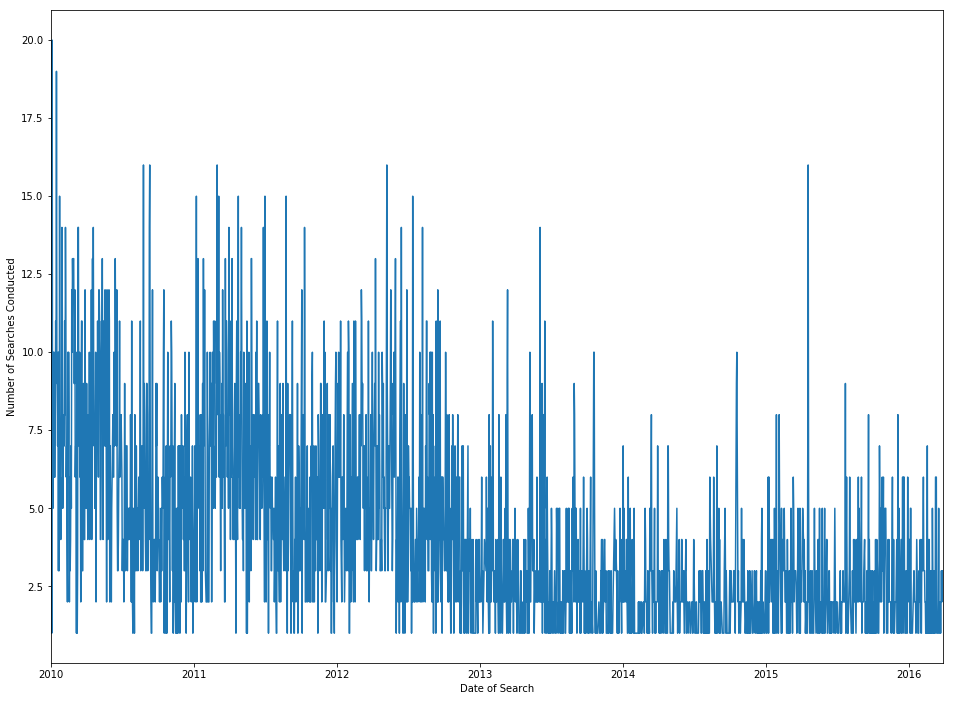

In [34]:
# Number of Searches Conducted Over Time
searchSeries.plot()
plt.xlabel('Date of Search')
plt.ylabel('Number of Searches Conducted')

plt.show()

We can see the general trend here, but it is difficult to read with each day plotted. We will now look at the search rate per month to see if that is easier to read.

In [35]:
# count searches by month
searchPerMonth = search['stop_date'].groupby([search.stop_date.dt.year.rename('year'),
                                              search.stop_date.dt.month.rename('month')]).agg('count')
searchPerMonth.head()

year  month
2010  1        270
      2        217
      3        231
      4        218
      5        273
Name: stop_date, dtype: int64

In [36]:
searchPerMonth = pd.DataFrame(data=searchPerMonth) # convert to Dataframe
searchPerMonth = searchPerMonth.reset_index(level=['year', 'month']) # change multi-index to columns
searchPerMonth = searchPerMonth.rename(columns={'stop_date':'search_count'}) # rename count column to search_count
searchPerMonth.head()

,year,month,search_count
0,2010,1,270
1,2010,2,217
2,2010,3,231
3,2010,4,218
4,2010,5,273


In [37]:
# convert back to datetime
searchPerMonth['stop_date'] = pd.to_datetime(searchPerMonth[['year','month']].assign(Day=1))
searchPerMonth.drop(['year','month'],axis=1, inplace = True) # drop year and month columns now that we have datetime
searchPerMonth.head()

,search_count,stop_date
0,270,2010-01-01
1,217,2010-02-01
2,231,2010-03-01
3,218,2010-04-01
4,273,2010-05-01


In [38]:
# Convert to series to plot
smSeries = pd.Series(searchPerMonth['search_count'].values, index=searchPerMonth['stop_date'])

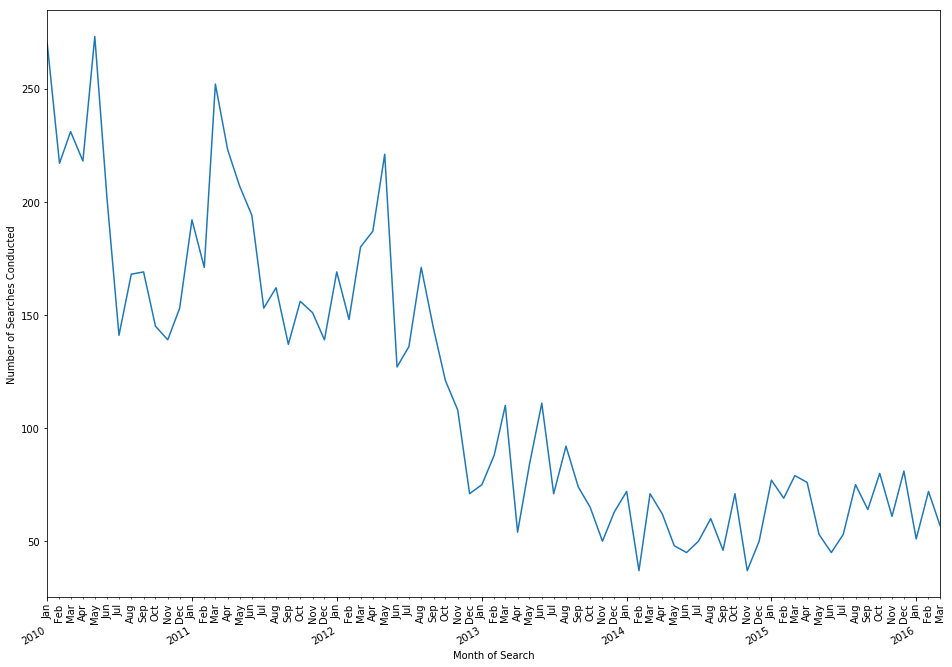

In [39]:
# Number of Searches Conducted Over Time (Per Month)
ax = smSeries.plot(x_compat=True)

# Format xticks (need x_compat=True above for this to show)
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.xlabel('Month of Search')
plt.ylabel('Number of Searches Conducted')

plt.show()

The search rate dropped dramatically in January 2013. This is when recreational marijuana became legal in Colorado.